# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

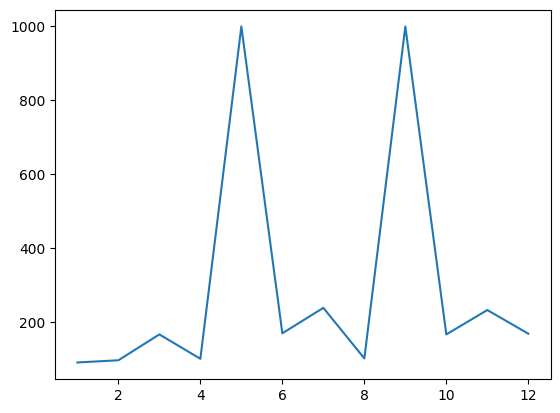

In [3]:
# ЭКСПЕРИМЕНТИРУЮ СО STRATEGY
method_list = {1: 'best1bin', 
2: 'best1exp',
3: 'rand1exp',
4: 'randtobest1exp',
5: 'currenttobest1exp',
6: 'best2exp',
7: 'rand2exp',
8: 'randtobest1bin',
9: 'currenttobest1bin',
10: 'best2bin',
11: 'rand2bin',
12: 'rand1bin'} # создаю словарь со всеми стратегиями

x = [] # список порядковых номеров стратегий
y = [] # список значений nit

for k, v in method_list.items(): # цикл прогона функции  для каждой стратегии
    x.append(k)
    res = differential_evolution(ackley, bounds, seed=42, strategy=v)
    y.append(res.nit)

plt.plot(x, y)
plt.show()

In [4]:
p = np.arange(1, 101, 1)
p

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [5]:
res = differential_evolution(ackley, bounds, seed=42, mutation=0)
res

 message: Optimization terminated successfully.
 success: True
     fun: 3.5744518772578506
       x: [ 9.685e-01 -9.685e-01]
     nit: 3
    nfev: 156
     jac: [-1.066e-06  3.908e-06]

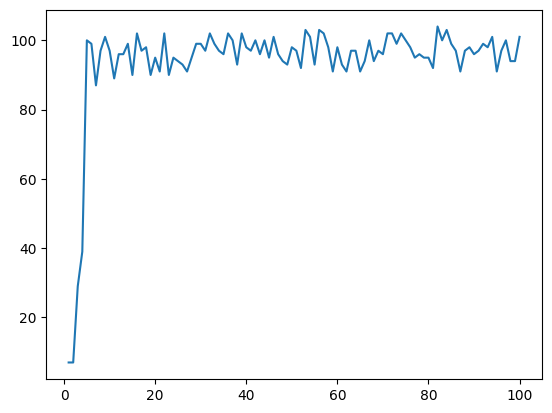

In [6]:
# ЭКСПЕРИМЕНТИРУЮ СО POPSIZE

p = np.arange(1, 101, 1) # создаю список popsize

x = [] # список порядковых номеров
y = [] # список значений nit

for n in p: # цикл прогона функции  для каждой стратегии
    x.append(n)
    res = differential_evolution(ackley, bounds, seed=42, popsize=n)
    y.append(res.nit)

plt.plot(x, y)
plt.show()

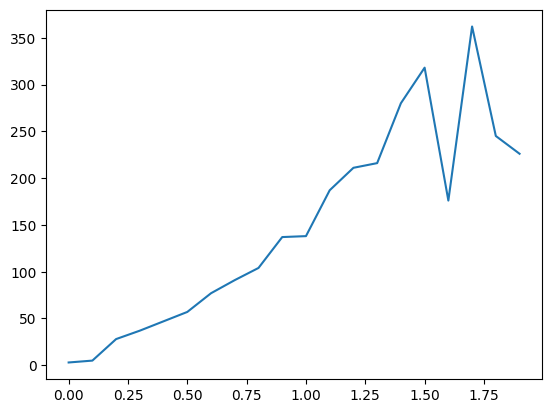

In [7]:
# ЭКСПЕРИМЕНТИРУЮ С MUTATION

m = np.arange(0, 2, 0.1) # создаю список mutation

x = [] # список порядковых номеров
y = [] # список значений nit

for n in m: # цикл прогона функции  для каждой стратегии
    x.append(n)
    res = differential_evolution(ackley, bounds, seed=42, mutation=n)
    y.append(res.nit)

plt.plot(x, y)
plt.show()

# на выходе

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [8]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

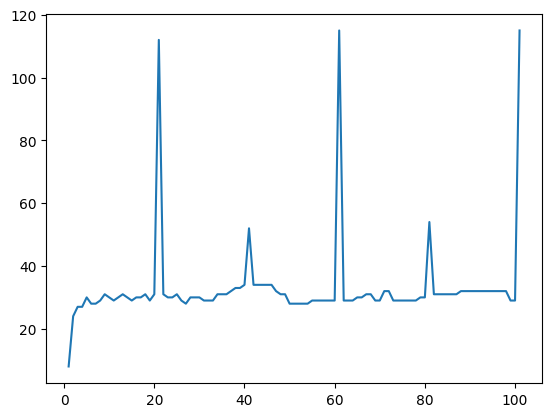

In [19]:
# БУДУ ЭКСПЕРИМЕНТИРОВАТЬ С x0, поочерёдно увеличивая его значение на 1 с [0, 0] до [100, 100]
# готовлю массив для перебора
x0l = [0, 0]
index = 0

for n in range(200):
    x0l.append(x0l[index]+1)
    index += 1

x0l = np.reshape(x0l, (101, 2))

# прогоняю все значения через функцию

x = [] # список порядковых номеров
y = [] # список значений nit
m = 0

for n in x0l: # цикл прогона функции  для каждой стратегии
    m += 1
    x.append(m)
    result_m = minimize(ackley, n,  method='Nelder-Mead')
    y.append(result_m.nit)

plt.plot(x, y)
plt.show()

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
